9.7 Estimation of a vector from one-bit measurements

We use the error function $\text{erf}(z)=\frac{2}{\sqrt{\pi}}\int_0^ze^{-t^2}\,dt$, which is log concave

https://en.wikipedia.org/wiki/Error_function

https://pytorch.org/docs/stable/special.html#torch.special.erf

Then for $x\sim\mathcal{N}(0,1),\Phi(L):=Prob[x\leq L] = \frac{1}{2} + \frac{1}{2}\text{erf}(\frac{L}{\sqrt{2}}) $

Note that $\Phi(L)=1-\Phi(-L)$

In [1]:
from NewtonSolver import NewtonSolver
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch.special import erf, erfcx

In [2]:
# y, A, b
y = torch.tensor([ 
   1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
   1.0000000e+00,
   1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
   1.0000000e+00,
   1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
  -1.0000000e+00,
   1.0000000e+00,
])

A = torch.tensor([
   8.9672442e-01,   2.0278812e+00,   1.8109478e+00,   1.9122551e-01,  -1.2638165e+00,  -2.1219039e+00,   1.6034812e+00,  -7.7613522e-01,   1.2860757e-01,  -3.3126343e-01,
  -7.8814330e-01,   2.5792105e-01,  -9.0955058e-01,  -2.1290584e-02,  -2.6424227e-01,   1.5968150e-01,   8.6628537e-02,   5.7713805e-01,   1.3085164e-01,   2.1255615e-01,
  -1.0437828e-01,  -5.4763155e-01,  -1.4820476e+00,  -6.1234503e-01,  -7.0513485e-01,  -4.7113701e-01,   1.0537235e-01,   6.4349929e-01,  -1.6714093e+00,   2.5474273e-01,
  -2.4138286e-01,  -1.5900403e+00,   2.7590077e-01,   5.6009750e-01,   1.0400399e+00,  -1.3024031e+00,   1.0800236e+00,   1.1189160e+00,  -1.7855145e-01,   4.0216222e-01,
   2.1138092e+00,  -9.5325431e-01,  -1.0020765e+00,   2.3250358e-01,  -2.0641149e-01,   2.6407812e-01,  -2.2031830e+00,  -1.3818282e+00,   9.5931587e-01,  -1.4251497e+00,
   1.7552375e+00,  -1.0671217e+00,   7.1459276e-01,  -6.3332352e-01,  -3.0099188e+00,  -1.0074531e-02,   5.6075361e-02,   1.3300983e-02,   2.4967071e+00,  -1.9754644e-01,
  -1.0497232e+00,  -2.9561787e-01,  -2.3393278e-01,   5.4860207e-02,   4.2295016e-01,   1.0443756e+00,  -5.3720633e-01,   7.2001531e-01,  -7.5689246e-01,  -4.7513512e-01,
  -2.8482461e-03,  -3.9436536e-02,  -2.8464827e-02,   5.7523770e-02,   1.8202031e-02,  -5.6883225e-02,  -2.4580565e-02,  -4.5001658e-03,   8.6827104e-03,  -2.4727627e-02,
   4.7306674e-01,  -1.2491567e-01,  -1.1702913e+00,  -9.6473408e-01,  -4.7839209e-01,  -9.4795242e-01,  -9.9117485e-01,  -3.3535152e+00,   1.1097120e+00,   2.3865455e-01,
   1.2034380e-01,  -9.3163334e-02,  -1.2420823e-01,  -1.1812429e+00,   1.1263069e+00,   3.6234892e-01,   3.2604104e-01,   9.3516228e-01,  -4.4845433e-01,   9.2129408e-01,
  -2.7822437e-01,  -6.9523851e-02,  -1.1706876e+00,   6.0142663e-01,  -7.4033772e-01,  -5.1042066e-01,   1.9574924e-01,  -1.2476827e+00,   1.0588047e+00,  -7.3751157e-01,
  -1.0872652e+00,   5.9298090e-01,   1.3005612e+00,   1.4006655e+00,   3.6356391e+00,   1.9117455e+00,  -3.0100514e+00,   1.1419125e+00,  -4.3139021e-01,  -6.8166173e-01,
   1.1571476e+00,  -1.9145628e+00,  -3.1475419e+00,  -1.0161652e-01,   2.2157335e+00,  -2.2108965e+00,   4.1091810e-01,  -2.4096310e+00,  -1.1593378e+00,  -1.0171296e-01,
  -3.1652180e+00,   2.8502436e+00,  -4.2892813e-01,   8.9809275e-01,  -1.6025746e+00,   8.6453037e-01,  -3.3437450e+00,   1.3903634e+00,   1.5406052e+00,  -3.1869179e-01,
   6.1949467e-02,  -1.3102086e-01,   3.4637748e-01,  -1.9552712e-01,   2.9408975e-02,  -4.0625520e-02,  -5.5021322e-01,   1.5699346e-01,  -5.4273435e-01,   2.3710459e-02,
  -6.0531467e-02,  -6.8086552e-01,  -1.5704820e-01,  -4.6422660e-01,  -3.3188840e-01,  -1.0200077e-01,   1.5358891e+00,   4.3705610e-01,  -3.5563090e-01,   1.4494426e+00,
   1.9222724e+00,   1.2618184e+00,  -1.6718108e+00,  -3.4509919e-01,   1.8222980e+00,  -2.2996011e-01,  -3.0464935e+00,   2.9696949e+00,  -3.5796222e+00,   2.7646619e-01,
   3.6584984e-02,   9.5602033e-01,  -2.0437823e+00,  -3.7319598e+00,  -3.8338063e+00,   9.5926547e-01,  -9.5599078e-01,   8.8807152e-02,   8.6885870e-01,   3.0893368e+00,
  -1.1075621e-01,  -1.3303346e-02,  -2.1600992e-02,   1.2455709e-01,  -5.0453143e-01,  -1.1281499e-01,  -1.0962148e-01,  -9.1369596e-01,   1.0488243e+00,   7.7386680e-01,
   1.5579540e+00,  -1.1091303e+00,  -2.1237434e+00,  -2.8814457e+00,   1.2055329e+00,   2.7479476e+00,  -1.0930041e-01,   2.0678886e+00,  -1.1481662e+00,   1.5338457e-01,
   2.9533785e-02,   5.9323914e-02,   4.2077800e-02,   1.2014181e-01,  -1.1443204e-01,  -1.0448806e-01,   1.0295039e-01,   1.9720133e-01,   1.6031758e-01,  -4.2854467e-02,
  -9.7074944e-01,  -2.2031135e-01,   6.2898308e-01,  -1.1017703e+00,  -1.0746949e-01,   2.6085382e-01,  -4.7287917e-01,   1.3444174e+00,   9.3418546e-01,   3.8128978e-01,
   1.0977640e+00,  -7.0582184e-01,  -1.5174387e+00,  -9.6642892e-02,   2.5221419e+00,  -1.8378626e+00,  -1.0884569e+00,   2.6063535e+00,  -1.4727563e+00,  -1.4995083e-01,
   3.1245154e-02,  -6.9505218e-03,  -4.4539330e-03,  -1.3064621e-02,  -1.7034112e-04,  -4.3519593e-03,  -2.9379015e-03,  -2.5410859e-02,  -4.5396390e-02,  -4.6775195e-03,
  -2.0308816e-01,  -4.2546762e-01,  -7.6844584e-03,  -2.7925816e-01,   3.4924110e-01,  -2.2634977e-01,   8.8211494e-03,  -6.8337235e-02,   4.9794902e-01,   9.6307694e-02,
   3.3199377e-01,  -1.1781916e-01,  -3.9676115e-01,  -4.9276626e-01,  -2.7024665e-01,  -4.2501032e-01,   1.3427512e-01,  -9.3841794e-02,   1.6004596e-01,   6.2657816e-01,
   4.8276277e-01,   2.4608865e-02,  -4.3109133e-01,   1.2243053e-01,   1.4835135e-02,  -3.5555969e-01,   4.4136682e-01,   1.0930736e-01,   9.6118442e-03,  -8.8577804e-01,
  -1.9720596e+00,   3.1189758e-01,   1.4080366e+00,  -4.9518819e-01,  -9.0942152e-01,  -3.3225737e-01,   8.1378320e-01,  -7.3034553e-01,  -4.8558984e-01,   1.0580503e+00,
  -8.0583719e-01,   7.5503913e-01,   1.3392800e-01,   4.0849586e-02,   3.3573862e-01,   1.6341639e-01,  -9.2456546e-01,  -5.4988568e-01,  -8.3345796e-01,  -3.9018142e-01,
   2.1146539e-01,  -1.6203430e-01,  -1.6317463e-01,  -1.3862740e-01,  -8.8037128e-02,   4.1378072e-03,   2.9804939e-01,  -1.9057636e-01,   8.9559308e-02,   4.9130949e-01,
   1.3417130e-02,  -1.7311680e-02,  -3.1785198e-02,   1.3616255e-02,  -1.5577504e-02,  -3.6371615e-02,  -2.6384356e-02,  -3.2063605e-02,   4.1869443e-02,   6.5147660e-02,
   9.7181638e-01,   1.1090091e+00,   6.9660513e-01,   5.8278960e-01,   1.0424485e+00,  -1.7752827e-01,   1.0284206e+00,   3.4952183e+00,  -1.2477669e+00,   1.0079057e-01,
   6.9104880e-01,   7.8725363e-01,  -6.7208081e-01,   6.6543790e-01,  -4.3191518e-02,  -1.2382711e+00,   1.2127099e+00,   1.7520360e-01,  -1.8229553e-01,   3.1101936e-01,
   1.2534344e+00,  -1.9542363e+00,   2.9340269e+00,   3.9721360e+00,   1.7126277e+00,   2.5393599e-01,   7.0690689e-01,  -5.5740430e-01,   1.4159360e+00,  -2.4842113e-01,
  -1.1658419e+00,  -1.4493189e-01,  -4.8862147e-01,   1.2470564e+00,  -2.1800049e+00,  -1.8443830e-01,   5.7855371e-01,  -6.2368605e-01,  -3.5377820e-01,  -8.2384457e-02,
   5.2688653e-01,   1.5184846e-01,   1.4348736e+00,  -8.4012233e-01,   4.6423252e-01,   3.7097410e-01,  -8.1308137e-02,  -4.3544861e-01,  -1.1232804e+00,  -1.0229805e+00,
  -1.9488596e+00,   1.8012505e+00,  -2.3233928e+00,  -1.7890345e+00,  -3.0488666e-02,  -1.0600622e+00,   4.0564435e+00,  -3.0971818e+00,  -2.5145245e+00,   1.4132532e+00,
   1.3042565e+00,   8.3874383e-01,   4.7196745e-01,   3.8920252e-01,  -9.9037746e-01,  -1.4752677e+00,  -5.5194100e-01,  -1.1284247e+00,  -3.8437634e-02,   5.5003191e-01,
  -2.3961327e-02,   4.1573836e-01,  -4.2846126e-01,  -5.5202255e-01,   3.4751020e-02,  -1.7074719e-01,   6.8561883e-02,  -5.1068704e-01,   7.5964929e-01,   2.6665500e-01,
  -2.6354307e-01,  -2.5275950e-01,   2.1757093e-01,   4.5003737e-01,  -1.4481443e+00,   5.2068219e-01,  -7.2440825e-01,  -9.4416242e-01,  -1.6200261e+00,  -3.9628203e-01,
   2.7547558e+00,  -5.5877952e-01,   1.6062134e-01,  -2.6358501e+00,  -8.6376424e-01,  -1.8999816e-01,   1.0099123e+00,  -2.1932830e+00,   1.3054053e+00,  -3.0653736e+00,
  -8.5617693e-03,  -1.2357248e-03,   2.3915089e-02,  -2.8561038e-02,  -9.7399583e-04,   1.7822438e-02,   4.0396202e-02,  -1.3968027e-02,   2.9987103e-02,  -1.6944418e-02,
   1.4930926e+00,   9.4287692e-01,  -9.9813367e-01,  -2.6932560e+00,   3.3575511e-01,  -3.0832331e+00,  -6.1164762e-03,  -4.9131790e-01,   1.4080582e-01,   2.1411891e+00,
   1.0441878e+00,  -4.6759669e-01,   1.3078941e+00,   3.9752949e-01,   9.9139749e-01,  -9.9494162e-02,   3.2754098e-01,  -1.3204471e+00,  -7.3861895e-01,  -1.2361878e-01,
  -1.4047730e+00,   6.4402065e-01,  -5.1854096e-01,   3.1338200e+00,   3.1495166e+00,  -2.1343949e+00,  -4.6271349e-01,   3.2504199e-01,  -1.5972607e+00,  -6.0015704e-01,
   4.9216514e-01,  -1.0120927e+00,  -6.1542473e-01,  -3.2237713e-01,  -4.9552952e-01,   1.9072956e+00,  -4.5019694e-01,   6.5683438e-01,  -2.3886748e+00,   3.9685235e-01,
  -2.5539478e-01,  -1.0282435e+00,   1.6403303e-02,   1.5899840e+00,  -1.8904059e-01,  -6.4146245e-01,  -2.3045384e-02,   9.4964608e-01,   1.1838629e+00,  -1.0029476e-01,
  -8.2453083e-01,   4.3955781e-01,   7.7011951e-01,  -1.6459634e-01,  -6.6722546e-01,  -8.5136410e-01,  -1.0511336e-01,  -8.8787459e-01,   2.2405864e-01,   1.0525870e-02,
   1.3464122e+00,   5.3505506e-01,   3.7737283e-01,  -7.3685909e-01,  -4.3270318e-01,  -4.5502210e-01,   5.5138499e-01,   1.3287025e-01,   1.0964611e-01,   2.6949356e-01,
   3.7369000e-02,   1.2218776e-01,   3.6661530e-01,   4.1608919e-01,   8.8560256e-01,  -5.2962954e-01,  -5.1008048e-01,   4.1211976e-01,   6.2113421e-02,  -8.6019649e-02 ]
   ).reshape(-1, 10)

b = torch.tensor([ 
   1.7995885e+01,
  -2.8767307e+00,
  -2.9607748e+01,
  -1.7043131e+00,
  -2.9133786e+01,
  -1.9846238e+01,
   7.2094282e-01,
  -4.3736266e-01,
  -3.4774177e+01,
   3.4921932e+00,
  -1.3124447e+01,
   4.5175754e+01,
  -5.0732032e+01,
   1.5296835e+01,
  -2.9476945e+00,
  -5.7536026e+00,
  -2.9385553e+00,
  -4.8972983e+01,
  -2.4994199e+00,
  -2.4333087e+01,
   1.8994666e+00,
   1.0932549e+00,
  -1.1228766e+01,
  -3.7615223e-01,
  -3.6815332e+00,
  -9.8225814e+00,
  -2.4347463e+00,
   5.8457895e+00,
   4.1235965e+00,
  -2.5531062e+00,
  -6.7348555e-01,
   3.8698665e+01,
   6.1292684e+00,
   5.0836982e+01,
  -1.1764957e+01,
   7.5412135e+00,
  -1.8756382e+01,
  -5.4399379e+00,
  -3.2619979e+00,
  -1.1491641e+01,
  -3.2998572e+01,
   1.8697162e-01,
  -3.2191777e+01,
   1.0995331e+01,
   2.8802909e+01,
  -1.2930727e+01,
   1.2706116e+00,
  -1.0630206e+00,
   2.8883680e-01,
   8.4656413e+00 ])

In [3]:
# use the symmetry of the gaussian distribution
A_hat = -torch.einsum('ij,i->ij', A, y)  
b_hat = -b * y

In [8]:
def shrinked_neg_log_likelihood(x):
    prob =  0.5 + 0.5 * erf((b_hat -  A_hat @ x) / torch.sqrt(torch.tensor([2])))
    shrinked_prob = prob * 0.999999 + 0.0000005  # shrink the prob to avoid log(0)
    return -torch.sum(torch.log(shrinked_prob))
def log_likelihood(x):
    prob =  0.5 + 0.5 * erf((b_hat -  A_hat @ x) / torch.sqrt(torch.tensor([2])))
    return torch.sum(torch.log(prob))

Newton method answer: tensor([-0.2707,  9.1485,  7.9786,  6.7035,  6.0267,  5.0120,  4.2998,  2.6765,
         2.0208,  0.6838])
opt log likelihood: tensor(-19.3005)


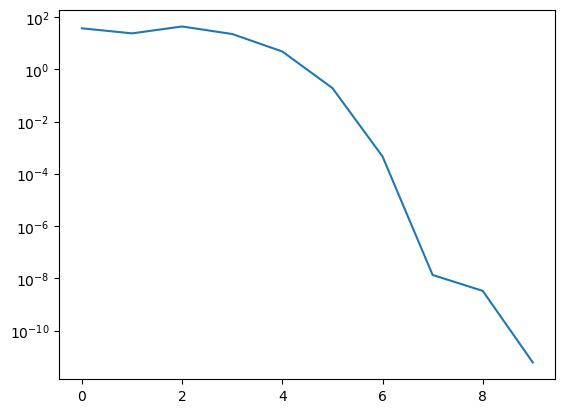

CVX answer: [-0.26389025  9.14687175  7.9735238   6.69969316  6.03625645  5.00385203
  4.30080727  2.67990516  2.0230068   0.6910166 ]
CVX log likelihood: tensor(-19.3029, dtype=torch.float64)


In [9]:
ll = - np.inf
answer = None
history = None
for i in range(0,10): # try a few different starting point
    np.random.seed(i) 
    problem = NewtonSolver(shrinked_neg_log_likelihood, torch.tensor(np.random.randn(A.shape[1])), tolerance=1e-9)
    ans = problem.solve().detach()
    if log_likelihood(ans) > ll:
        ll = log_likelihood(ans)
        answer = ans
        history = problem.history
print('Newton method answer:', answer)
print('opt log likelihood:', ll)
plt.plot(history)
plt.yscale('log')
plt.show()
import cvxpy as cp 
x = cp.Variable(A.shape[1])
objective = cp.Maximize(cp.sum(cp.log_normcdf(b_hat - A_hat @ x)))
constraints = []
prob = cp.Problem(objective, constraints)
result = prob.solve()
print('CVX answer:', x.value)
print('CVX log likelihood:', log_likelihood(x.value))